In [1]:
pip install fastf1

  Obtaining dependency information for fastf1 from https://files.pythonhosted.org/packages/ff/cf/8d412e5e8d04b00a62c08990a2e52a20ee8f389cedb071affa19ed256c41/fastf1-3.3.9-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib<4.0.0,>=3.5.1 from https://files.pythonhosted.org/packages/b1/ea/129163dcd21db6da5d559a8160c4a74c1dc5f96ac246a3d4248b43c7648d/matplotlib-3.7.5-cp38-cp38-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for requests-cache>=1.0.0 from https://files.pythonhosted.org/packages/4e/2e/8f4051119f460cfc786aa91f212165bb6e643283b533db572d7b33952bd2/requests_cache-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for scipy<2.0.0,>=1.7.3 from https://files.pythonhosted.org/packages/a0/e3/37508a11dae501349d7c16e4dd18c706a023629eedc650ee094593887a89/scipy-1.10.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for th

In [37]:
import fastf1
import pandas as pd
import time
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# uncomment the following in google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
## Only work in google colab
fastf1.Cache.enable_cache('/content/drive/My Drive/')

In [ ]:
## get event schedule for the last 5 years
## Only work in google colab

event_schedule = pd.DataFrame()

for year in range(2019, 2025):
  schedule = fastf1.get_event_schedule(year)
  schedule['year'] = year
  event_schedule = pd.concat([event_schedule, schedule])

event_schedule.to_csv('/content/drive/MyDrive/event_schedule.csv', index=False)

In [10]:
## point to local download file
event_schedule = pd.read_csv('data/event_schedule.csv')
event_schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport,year
0,1,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2019,2019-03-17 00:00:00,Australian Grand Prix,conventional,Practice 1,2019-03-15 12:00:00+11:00,2019-03-15 01:00:00,...,2019-03-16 14:00:00+11:00,2019-03-16 03:00:00,Qualifying,2019-03-16 17:00:00+11:00,2019-03-16 06:00:00,Race,2019-03-17 16:10:00+11:00,2019-03-17 05:10:00,True,2019
1,2,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2019,2019-03-31 00:00:00,Bahrain Grand Prix,conventional,Practice 1,2019-03-29 14:00:00+03:00,2019-03-29 11:00:00,...,2019-03-30 15:00:00+03:00,2019-03-30 12:00:00,Qualifying,2019-03-30 18:00:00+03:00,2019-03-30 15:00:00,Race,2019-03-31 18:10:00+03:00,2019-03-31 15:10:00,True,2019
2,3,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2019,2019-04-14 00:00:00,Chinese Grand Prix,conventional,Practice 1,2019-04-12 10:00:00+08:00,2019-04-12 02:00:00,...,2019-04-13 11:00:00+08:00,2019-04-13 03:00:00,Qualifying,2019-04-13 14:00:00+08:00,2019-04-13 06:00:00,Race,2019-04-14 14:10:00+08:00,2019-04-14 06:10:00,True,2019
3,4,Azerbaijan,Baku,FORMULA 1 SOCAR AZERBAIJAN GRAND PRIX 2019,2019-04-28 00:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2019-04-26 13:00:00+04:00,2019-04-26 09:00:00,...,2019-04-27 14:00:00+04:00,2019-04-27 10:00:00,Qualifying,2019-04-27 17:00:00+04:00,2019-04-27 13:00:00,Race,2019-04-28 16:10:00+04:00,2019-04-28 12:10:00,True,2019
4,5,Spain,Barcelona,FORMULA 1 EMIRATES GRAN PREMIO DE ESPAÑA 2019,2019-05-12 00:00:00,Spanish Grand Prix,conventional,Practice 1,2019-05-10 11:00:00+02:00,2019-05-10 09:00:00,...,2019-05-11 12:00:00+02:00,2019-05-11 10:00:00,Qualifying,2019-05-11 15:00:00+02:00,2019-05-11 13:00:00,Race,2019-05-12 15:10:00+02:00,2019-05-12 13:10:00,True,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024,2024-10-27 00:00:00,Mexico City Grand Prix,conventional,Practice 1,2024-10-25 12:30:00-06:00,2024-10-25 18:30:00,...,2024-10-26 11:30:00-06:00,2024-10-26 17:30:00,Qualifying,2024-10-26 15:00:00-06:00,2024-10-26 21:00:00,Race,2024-10-27 14:00:00-06:00,2024-10-27 20:00:00,True,2024
131,21,Brazil,São Paulo,FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024,2024-11-03 00:00:00,São Paulo Grand Prix,sprint_qualifying,Practice 1,2024-11-01 11:30:00-03:00,2024-11-01 14:30:00,...,2024-11-02 11:00:00-03:00,2024-11-02 14:00:00,Qualifying,2024-11-03 07:30:00-03:00,2024-11-03 10:30:00,Race,2024-11-03 12:30:00-03:00,2024-11-03 15:30:00,True,2024
132,22,United States,Las Vegas,FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX...,2024-11-24 00:00:00,Las Vegas Grand Prix,conventional,Practice 1,2024-11-21 18:30:00-08:00,2024-11-22 02:30:00,...,2024-11-22 18:30:00-08:00,2024-11-23 02:30:00,Qualifying,2024-11-22 22:00:00-08:00,2024-11-23 06:00:00,Race,2024-11-23 22:00:00-08:00,2024-11-24 06:00:00,True,2024
133,23,Qatar,Lusail,FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024,2024-12-01 00:00:00,Qatar Grand Prix,sprint_qualifying,Practice 1,2024-11-29 16:30:00+03:00,2024-11-29 13:30:00,...,2024-11-30 17:00:00+03:00,2024-11-30 14:00:00,Qualifying,2024-11-30 21:00:00+03:00,2024-11-30 18:00:00,Race,2024-12-01 19:00:00+03:00,2024-12-01 16:00:00,True,2024


In [11]:
event_schedule.columns

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport', 'year'],
      dtype='object')

In [ ]:
## get all the session results in the last 5 years
## Only work in google colab

for year in range(2019, 2025):
  session_results = []
  for rnd in event_schedule[event_schedule['year'] == year]['RoundNumber'].unique():
    if rnd == 0:
      continue
    for session_type in ['Q', 'R']:
      try:
        session = fastf1.get_session(year, rnd, session_type)
        session.load()
        results = session.results
        weather = session.weather_data
        if not results.empty:
          results['year'] = year
          results['roundNumber'] = rnd
          results['session_type'] = session_type
          results['has_rain'] = True in weather['Rainfall'].unique()
          session_results.append(results)
          # time.sleep(60)
      except Exception as e:
        print(f"Error retrieving {session_type} results for {year} round {rnd}: {e}")

  if session_results:
    combined_results = pd.concat(session_results)
    combined_results.to_csv(f'/content/drive/My Drive/F1_results_{year}_v2.csv', index=False)
    print(f"Saved results for {year} to Google Drive.")

In [74]:
## combine all the results from 2019 to 2024
## point to local download file

file_list = [f'data/F1_results_{year}_v2.csv' for year in range(2019, 2025)]
combined_df = pd.DataFrame()
for file in file_list:
  if os.path.exists(file):
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [75]:
combined_df.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'year',
       'roundNumber', 'session_type', 'has_rain'],
      dtype='object')

In [76]:
## convert qualification time to seconds
combined_df['Q1'] = pd.to_timedelta(combined_df['Q1']).dt.total_seconds()
combined_df['Q2'] = pd.to_timedelta(combined_df['Q2']).dt.total_seconds()
combined_df['Q3'] = pd.to_timedelta(combined_df['Q3']).dt.total_seconds()
combined_df['Time'] = pd.to_timedelta(combined_df['Time']).dt.total_seconds()

In [77]:
combined_df.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Q1,Q2,Q3,Time,Status,Points,year,roundNumber,session_type,has_rain
0,44,L HAMILTON,HAM,hamilton,Mercedes,00d2be,mercedes,Lewis,Hamilton,Lewis Hamilton,...,82.043,81.014,80.486,NaN,NaN,NaN,2019,1,Q,False
1,77,V BOTTAS,BOT,bottas,Mercedes,00d2be,mercedes,Valtteri,Bottas,Valtteri Bottas,...,82.367,81.193,80.598,NaN,NaN,NaN,2019,1,Q,False
2,5,S VETTEL,VET,vettel,Ferrari,dc0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,82.885,81.912,81.190,NaN,NaN,NaN,2019,1,Q,False
3,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1e41ff,red_bull,Max,Verstappen,Max Verstappen,...,82.876,81.678,81.320,NaN,NaN,NaN,2019,1,Q,False
4,16,C LECLERC,LEC,leclerc,Ferrari,dc0000,ferrari,Charles,Leclerc,Charles Leclerc,...,82.017,81.739,81.442,NaN,NaN,NaN,2019,1,Q,False


In [78]:
## pre-process the data

## remove where there's no results
combined_df = combined_df[combined_df['Position'].notna()]

## remove redundent columns
combined_df = combined_df.drop(['DriverNumber', 'BroadcastName', 'CountryCode', 'Abbreviation', 'TeamId', 'TeamColor', 'FirstName', 'LastName', 'DriverId', 'HeadshotUrl'], axis = 1)
combined_df.reset_index().drop('index', axis = 1)

## pivot on session_type
id_cols = ['FullName', 'TeamName', 'year', 'roundNumber']
value_cols = [col for col in combined_df.columns if col not in id_cols]
combined_df_pivot = combined_df.pivot(index=id_cols, columns='session_type', values=value_cols)
## Flatten
combined_df_pivot.columns = ['_'.join(col).strip() for col in combined_df_pivot.columns.values]
## Reset the index to get a regular DataFrame
combined_df_pivot = combined_df_pivot.reset_index()
## Drop the columns that are all nulls
combined_df_pivot = combined_df_pivot.dropna(axis=1, how='all')
## Rename roundNumber to RoundNumber
combined_df_pivot = combined_df_pivot.rename(columns={'roundNumber': 'RoundNumber'})

## join event info
combined_df_pivot = pd.merge(combined_df_pivot, event_schedule[['year', 'RoundNumber', 'Country', 'Location', 'EventFormat']],
                                  on = ['year', 'RoundNumber'], how='left')


In [79]:
combined_df_pivot.head()

,FullName,TeamName,year,RoundNumber,Position_Q,Position_R,ClassifiedPosition_R,GridPosition_R,Q1_Q,Q2_Q,...,Time_R,Status_R,Points_R,session_type_Q,session_type_R,has_rain_Q,has_rain_R,Country,Location,EventFormat
0,Alexander Albon,Red Bull Racing,2019,13,14.0,5.0,5,17.0,105.528,105.799,...,81.325,Finished,10.0,Q,R,False,False,Belgium,Spa-Francorchamps,conventional
1,Alexander Albon,Red Bull Racing,2019,14,8.0,6.0,6,8.0,80.382,80.021,...,59.315,Finished,8.0,Q,R,False,False,Italy,Monza,conventional
2,Alexander Albon,Red Bull Racing,2019,15,6.0,6.0,6,6.0,99.106,97.865,...,11.663,Finished,8.0,Q,R,False,False,Singapore,Singapore,conventional
3,Alexander Albon,Red Bull Racing,2019,16,19.0,5.0,5,0.0,99.197,NaN,...,38.348,Finished,10.0,Q,R,False,True,Russia,Sochi,conventional
4,Alexander Albon,Red Bull Racing,2019,17,6.0,4.0,4,6.0,89.351,88.156,...,59.537,Finished,12.0,Q,R,False,False,Japan,Suzuka,conventional


In [80]:
## convert columns to numerical
for col in combined_df_pivot.columns:
    try:
        combined_df_pivot[col] = pd.to_numeric(combined_df_pivot[col], errors='raise')
    except (ValueError, TypeError):
        print(f"Column '{col}' could not be converted to numeric. Keeping original values.")
combined_df_pivot.dtypes

Column 'FullName' could not be converted to numeric. Keeping original values.
Column 'TeamName' could not be converted to numeric. Keeping original values.
Column 'ClassifiedPosition_R' could not be converted to numeric. Keeping original values.
Column 'Status_R' could not be converted to numeric. Keeping original values.
Column 'session_type_Q' could not be converted to numeric. Keeping original values.
Column 'session_type_R' could not be converted to numeric. Keeping original values.
Column 'Country' could not be converted to numeric. Keeping original values.
Column 'Location' could not be converted to numeric. Keeping original values.
Column 'EventFormat' could not be converted to numeric. Keeping original values.


FullName                 object
TeamName                 object
year                      int64
RoundNumber               int64
Position_Q              float64
Position_R              float64
ClassifiedPosition_R     object
GridPosition_R          float64
Q1_Q                    float64
Q2_Q                    float64
Q3_Q                    float64
Time_R                  float64
Status_R                 object
Points_R                float64
session_type_Q           object
session_type_R           object
has_rain_Q              float64
has_rain_R              float64
Country                  object
Location                 object
EventFormat              object
dtype: object

In [81]:
combined_df_pivot.head()

,FullName,TeamName,year,RoundNumber,Position_Q,Position_R,ClassifiedPosition_R,GridPosition_R,Q1_Q,Q2_Q,...,Time_R,Status_R,Points_R,session_type_Q,session_type_R,has_rain_Q,has_rain_R,Country,Location,EventFormat
0,Alexander Albon,Red Bull Racing,2019,13,14.0,5.0,5,17.0,105.528,105.799,...,81.325,Finished,10.0,Q,R,0.0,0.0,Belgium,Spa-Francorchamps,conventional
1,Alexander Albon,Red Bull Racing,2019,14,8.0,6.0,6,8.0,80.382,80.021,...,59.315,Finished,8.0,Q,R,0.0,0.0,Italy,Monza,conventional
2,Alexander Albon,Red Bull Racing,2019,15,6.0,6.0,6,6.0,99.106,97.865,...,11.663,Finished,8.0,Q,R,0.0,0.0,Singapore,Singapore,conventional
3,Alexander Albon,Red Bull Racing,2019,16,19.0,5.0,5,0.0,99.197,NaN,...,38.348,Finished,10.0,Q,R,0.0,1.0,Russia,Sochi,conventional
4,Alexander Albon,Red Bull Racing,2019,17,6.0,4.0,4,6.0,89.351,88.156,...,59.537,Finished,12.0,Q,R,0.0,0.0,Japan,Suzuka,conventional


In [82]:
## test correlation between all numerical columns and Position of the race

numerical_cols = combined_df_pivot.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('Position_R')

correlation = combined_df_pivot[numerical_cols].corrwith(combined_df_pivot['Position_R'])
correlation = correlation.rename('corr')
correlation.sort_values(ascending = False)


Position_Q        0.636471
GridPosition_R    0.560335
Q1_Q              0.025381
Q3_Q              0.017692
Q2_Q              0.010889
has_rain_R        0.001455
RoundNumber       0.000213
has_rain_Q        0.000002
year             -0.001465
Time_R           -0.399706
Points_R         -0.852232
Name: corr, dtype: float64

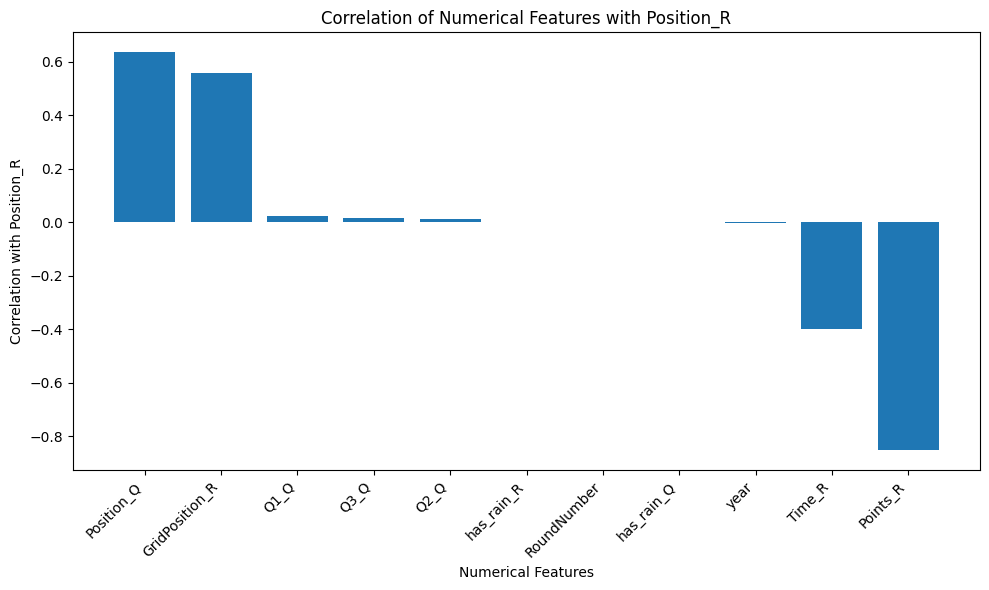

In [83]:
correlation = correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(correlation.index, correlation.values)
plt.xlabel("Numerical Features")
plt.ylabel("Correlation with Position_R")
plt.title("Correlation of Numerical Features with Position_R")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
combined_df_pivot.columns

Index(['FullName', 'TeamName', 'year', 'RoundNumber', 'Position_Q',
       'Position_R', 'ClassifiedPosition_R', 'GridPosition_R', 'Q1_Q', 'Q2_Q',
       'Q3_Q', 'Time_R', 'Status_R', 'Points_R', 'session_type_Q',
       'session_type_R', 'has_rain_Q', 'has_rain_R', 'Country', 'Location',
       'EventFormat'],
      dtype='object')

In [85]:
## use cramers v to test the correlation between all columns with the column Position.
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

columns_to_correlate = [col for col in combined_df_pivot.columns if col != 'Position' and col not in numerical_cols]
columns_to_correlate.remove('Position_R')

correlations = {}
for col in columns_to_correlate:
  correlation = cramers_v(combined_df_pivot['Position_R'], combined_df_pivot[col])
  correlations[col] = correlation

cramers_v_df = pd.DataFrame(list(correlations.items()), columns=['column', 'cramersV'])
cramers_v_df.sort_values(by = 'cramersV', ascending = False)


,column,cramersV
2,ClassifiedPosition_R,0.949211
3,Status_R,0.222093
1,TeamName,0.201764
0,FullName,0.192885
6,Country,0.000000
7,Location,0.000000
8,EventFormat,0.000000
4,session_type_Q,NaN
5,session_type_R,NaN


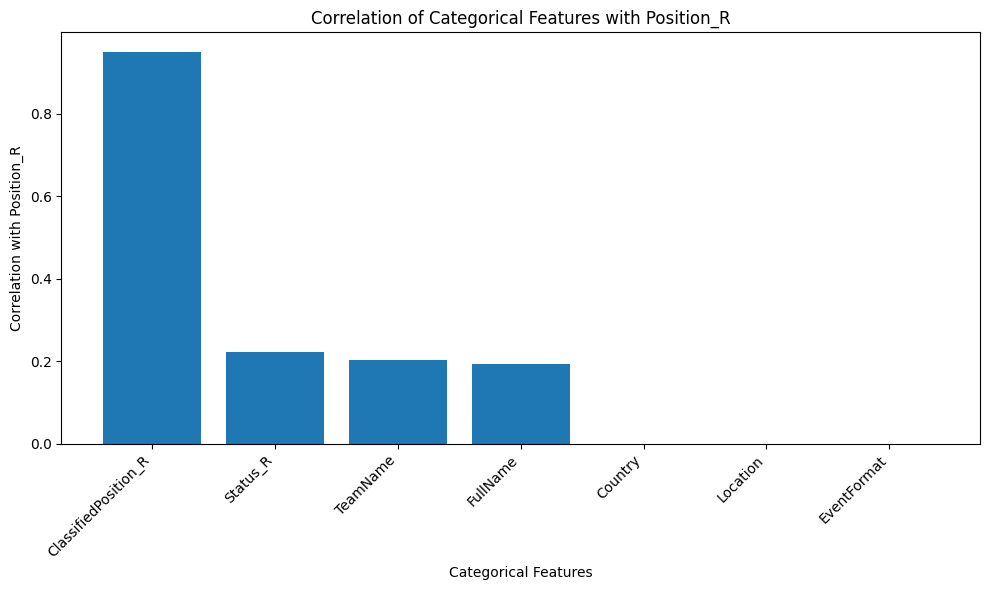

In [86]:
cramers_v_df = cramers_v_df.sort_values(by = 'cramersV', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(cramers_v_df.column, cramers_v_df.cramersV)
plt.xlabel("Categorical Features")
plt.ylabel("Correlation with Position_R")
plt.title("Correlation of Categorical Features with Position_R")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
combined_df_pivot = combined_df_pivot.drop(['session_type_Q', 'session_type_R', 'ClassifiedPosition_R', 'Time_R', 'Status_R'], axis = 1)
combined_df_pivot

,FullName,TeamName,year,RoundNumber,Position_Q,Position_R,GridPosition_R,Q1_Q,Q2_Q,Q3_Q,Points_R,has_rain_Q,has_rain_R,Country,Location,EventFormat
0,Alexander Albon,Red Bull Racing,2019,13,14.0,5.0,17.0,105.528,105.799,NaN,10.0,0.0,0.0,Belgium,Spa-Francorchamps,conventional
1,Alexander Albon,Red Bull Racing,2019,14,8.0,6.0,8.0,80.382,80.021,NaN,8.0,0.0,0.0,Italy,Monza,conventional
2,Alexander Albon,Red Bull Racing,2019,15,6.0,6.0,6.0,99.106,97.865,97.411,8.0,0.0,0.0,Singapore,Singapore,conventional
3,Alexander Albon,Red Bull Racing,2019,16,19.0,5.0,0.0,99.197,NaN,NaN,10.0,0.0,1.0,Russia,Sochi,conventional
4,Alexander Albon,Red Bull Racing,2019,17,6.0,4.0,6.0,89.351,88.156,87.851,12.0,0.0,0.0,Japan,Suzuka,conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Yuki Tsunoda,RB,2024,17,12.0,20.0,11.0,103.337,103.035,NaN,0.0,0.0,0.0,Azerbaijan,Baku,conventional
2495,Yuki Tsunoda,RB,2024,18,8.0,12.0,8.0,90.710,90.289,90.354,0.0,0.0,0.0,Singapore,Marina Bay,conventional
2496,Yuki Tsunoda,RB,2024,19,11.0,14.0,10.0,93.795,93.506,NaN,0.0,0.0,0.0,United States,Austin,sprint_qualifying
2497,Yuki Tsunoda,RB,2024,20,11.0,20.0,11.0,77.182,77.129,NaN,0.0,0.0,0.0,Mexico,Mexico City,conventional


In [88]:
# ADD new features
## Create new columns to rank Q1_Q, Q2_Q, Q3_Q for each year and RoundNumber
combined_df_pivot = combined_df_pivot.sort_values(['year','RoundNumber'])
for col in ['Q1_Q', 'Q2_Q', 'Q3_Q']:
  combined_df_pivot[f'{col}_Rank'] = combined_df_pivot.groupby(['year', 'RoundNumber'])[col].rank(method='min', ascending=True).fillna(99)
  # combined_df_pivot[f'{col}_Exist'] = combined_df_pivot[col].notnull()
## add cumulative scores per driver before this race
combined_df_pivot['Points_R'] = combined_df_pivot['Points_R'].astype(float)
combined_df_pivot['DriverPointsBefore'] = combined_df_pivot.groupby(['FullName', 'year'])['Points_R'].transform(lambda x: x.cumsum() - x).fillna(0)
## add cumulative scores per team before this race
combined_df_pivot['TeamPointsBefore'] = combined_df_pivot.groupby(['TeamName', 'year'])['Points_R'].transform(lambda x: x.cumsum() - x).fillna(0)
## standardize qualification position
combined_df_pivot['Position_Q'] = pd.to_numeric(combined_df_pivot['Position_Q'], errors='coerce').fillna(99).astype(int)
## fill null
combined_df_pivot['Q2_Q'] = combined_df_pivot['Q2_Q'].fillna(combined_df_pivot['Q1_Q'])
combined_df_pivot['Q3_Q'] = combined_df_pivot['Q3_Q'].fillna(combined_df_pivot['Q2_Q'])
## drop the record if gridPosition_R is null
combined_df_pivot = combined_df_pivot.dropna(subset=['GridPosition_R'])
## drop the record if Q1_Q is null
combined_df_pivot = combined_df_pivot.dropna(subset=['Q1_Q'])
# ## standardize grid position
# combined_df_pivot['GridPosition_R'] = pd.to_numeric(combined_df_pivot['GridPosition_R'], errors='coerce').fillna(99).astype(int)
# ## standardize race position
# combined_df_pivot['Position_R'] = pd.to_numeric(combined_df_pivot['Position_R'], errors='coerce').fillna(99).astype(int)
## drop gridPosition_R
combined_df_pivot = combined_df_pivot.drop('GridPosition_R', axis=1)
## write to google drive
combined_df_pivot.to_csv(f'data/F1_results_2019_2024_v2.csv', index=False)

In [89]:

combined_df_pivot = pd.read_csv(f'data/F1_results_2019_2024_v2.csv')
combined_df_pivot.sort_values(['year', 'TeamName', 'FullName'])[['FullName', 'TeamName', 'year', 'RoundNumber', 'Points_R',  'DriverPointsBefore', 'TeamPointsBefore']].head(30)

,FullName,TeamName,year,RoundNumber,Points_R,DriverPointsBefore,TeamPointsBefore
1,Antonio Giovinazzi,Alfa Romeo Racing,2019,1,0.0,0.0,0.0
21,Antonio Giovinazzi,Alfa Romeo Racing,2019,2,0.0,0.0,4.0
59,Antonio Giovinazzi,Alfa Romeo Racing,2019,4,0.0,0.0,12.0
77,Antonio Giovinazzi,Alfa Romeo Racing,2019,5,0.0,0.0,13.0
97,Antonio Giovinazzi,Alfa Romeo Racing,2019,6,0.0,0.0,13.0
117,Antonio Giovinazzi,Alfa Romeo Racing,2019,7,0.0,0.0,13.0
137,Antonio Giovinazzi,Alfa Romeo Racing,2019,8,0.0,0.0,13.0
157,Antonio Giovinazzi,Alfa Romeo Racing,2019,9,1.0,0.0,19.0
177,Antonio Giovinazzi,Alfa Romeo Racing,2019,10,0.0,1.0,22.0
197,Antonio Giovinazzi,Alfa Romeo Racing,2019,11,0.0,1.0,26.0


In [90]:
combined_df_pivot['Position_R'].unique()

array([14., 15., 20.,  5., 19., 10., 16.,  6.,  8.,  9., 12.,  2.,  3.,
        7., 11., 17., 18.,  4., 13.,  1.])

In [91]:
combined_df_pivot.groupby('year').count().head(10)

,FullName,TeamName,RoundNumber,Position_Q,Position_R,Q1_Q,Q2_Q,Q3_Q,Points_R,has_rain_Q,has_rain_R,Country,Location,EventFormat,Q1_Q_Rank,Q2_Q_Rank,Q3_Q_Rank,DriverPointsBefore,TeamPointsBefore
year,,,,,,,,,,,,,,,,,,,
2019,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
2020,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
2021,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431
2022,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
2023,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434
2024,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415


In [92]:
combined_df.groupby('year').count()

,TeamName,FullName,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,roundNumber,session_type,has_rain
year,,,,,,,,,,,,,,
2019,838,838,838,420,420,409,310,199,196,420,420,838,838,838
2020,680,680,680,340,340,339,253,167,191,340,340,680,680,680
2021,878,878,878,439,439,432,324,218,207,439,439,878,878,878
2022,879,879,879,439,439,436,324,211,279,439,439,879,879,879
2023,879,879,879,439,439,435,326,214,304,439,439,879,879,879
2024,838,838,838,419,419,415,312,204,248,419,419,838,838,838


In [93]:
## seperate train (2019-2023) and test (2024) data

before_2024 = combined_df_pivot[combined_df_pivot['year'] < 2024]
only_2024 = combined_df_pivot[(combined_df_pivot['year'] == 2024) & (combined_df_pivot['RoundNumber'] < 21)]
future = combined_df_pivot[(combined_df_pivot['year'] == 2024) & (combined_df_pivot['RoundNumber'] == 21)].drop(['Position_R', 'Points_R', 'has_rain_R'], axis = 1)
future_rain = future.copy()
future_rain['has_rain_R'] = True
future_no_rain = future.copy()
future_no_rain['has_rain_R'] = False
future_clean = pd.concat([future_rain, future_no_rain])

before_2024.to_csv('data/F1_results_train_v2.csv', index=False)
only_2024.to_csv('data/F1_results_test_v2.csv', index=False)
future_clean.to_csv('data/F1_future_v2.csv', index=False)

In [94]:
train2 = pd.read_csv('data/F1_results_train_v2.csv')
test2 = pd.read_csv('data/F1_results_test_v2.csv')

In [95]:
test2['RoundNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [96]:
train2.groupby('year').count()

,FullName,TeamName,RoundNumber,Position_Q,Position_R,Q1_Q,Q2_Q,Q3_Q,Points_R,has_rain_Q,has_rain_R,Country,Location,EventFormat,Q1_Q_Rank,Q2_Q_Rank,Q3_Q_Rank,DriverPointsBefore,TeamPointsBefore
year,,,,,,,,,,,,,,,,,,,
2019,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
2020,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
2021,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431
2022,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
2023,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434


In [97]:
future_clean = pd.read_csv('data/F1_future_v2.csv')
future_clean.columns

Index(['FullName', 'TeamName', 'year', 'RoundNumber', 'Position_Q', 'Q1_Q',
       'Q2_Q', 'Q3_Q', 'has_rain_Q', 'Country', 'Location', 'EventFormat',
       'Q1_Q_Rank', 'Q2_Q_Rank', 'Q3_Q_Rank', 'DriverPointsBefore',
       'TeamPointsBefore', 'has_rain_R'],
      dtype='object')

In [98]:
future_clean

,FullName,TeamName,year,RoundNumber,Position_Q,Q1_Q,Q2_Q,Q3_Q,has_rain_Q,Country,Location,EventFormat,Q1_Q_Rank,Q2_Q_Rank,Q3_Q_Rank,DriverPointsBefore,TeamPointsBefore,has_rain_R
0,Alexander Albon,Williams,2024,21,7,89.072,85.889,84.657,1.0,Brazil,São Paulo,sprint_qualifying,2.0,5.0,7.0,12.0,17.0,True
1,Carlos Sainz,Ferrari,2024,21,14,90.303,89.406,89.406,1.0,Brazil,São Paulo,sprint_qualifying,11.0,14.0,99.0,221.0,499.0,True
2,Charles Leclerc,Ferrari,2024,21,6,89.839,86.097,84.525,1.0,Brazil,São Paulo,sprint_qualifying,7.0,6.0,6.0,272.0,499.0,True
3,Esteban Ocon,Alpine,2024,21,4,89.171,86.206,84.475,1.0,Brazil,São Paulo,sprint_qualifying,4.0,7.0,4.0,5.0,14.0,True
4,Fernando Alonso,Aston Martin,2024,21,9,90.207,85.035,88.998,1.0,Brazil,São Paulo,sprint_qualifying,10.0,2.0,9.0,62.0,86.0,True
5,Franco Colapinto,Williams,2024,21,18,91.270,91.270,91.270,1.0,Brazil,São Paulo,sprint_qualifying,18.0,99.0,99.0,5.0,17.0,True
6,George Russell,Mercedes,2024,21,2,89.121,86.307,83.578,1.0,Brazil,São Paulo,sprint_qualifying,3.0,8.0,2.0,167.0,343.0,True
7,Guanyu Zhou,Kick Sauber,2024,21,20,92.263,92.263,92.263,1.0,Brazil,São Paulo,sprint_qualifying,20.0,99.0,99.0,0.0,0.0,True
8,Lance Stroll,Aston Martin,2024,21,10,90.580,86.334,86.334,1.0,Brazil,São Paulo,sprint_qualifying,12.0,9.0,99.0,24.0,86.0,True
9,Lando Norris,McLaren,2024,21,1,90.944,84.844,83.405,1.0,Brazil,São Paulo,sprint_qualifying,15.0,1.0,1.0,300.0,539.0,True
